In [1]:
import numpy as numpy
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('house_data/train-v3.csv')
validation_data = pd.read_csv('house_data/valid-v3.csv')
test_data = pd.read_csv('house_data/test-v3.csv')
test_sample_data =  pd.read_csv('house_data/sampleSubmission.csv')

In [3]:
cols = ['price','sale_yr','sale_month','sale_day','bedrooms','bathrooms',
        'sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','yr_built','yr_renovated',
        'zipcode','lat','long','sqft_living15','sqft_lot15']
test_cols  = ['id','sale_yr','sale_month','sale_day','bedrooms','bathrooms',
              'sqft_living','sqft_lot','floors','waterfront','view',
              'condition','grade','sqft_above','sqft_basement','yr_built',
              'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
test_sample_cols = ['price']
train_data = train_data[cols]
validation_data = validation_data[cols]
test_data = test_data[test_cols]
test_sample_data = test_sample_data[test_sample_cols]

In [4]:
all_data = pd.concat([train_data,validation_data])
all_ndarray = all_data.values
all_Features = all_ndarray[:,1:]
all_Label = all_ndarray[:,0]
all_new_Features = preprocessing.scale(all_Features)

In [5]:
validation_data_ndarray = validation_data.values
validation_data_Features = validation_data_ndarray[:,1:]
validation_data_Label = validation_data_ndarray[:,0]
validation_data_scaledFeatures  = ( ( validation_data_Features - all_Features.mean(axis=0) ) / all_Features.std(axis=0) )

In [6]:
test_data_2 = test_data.drop(['id'],axis=1)
test_ndarray = test_data_2.values
test_Features = test_ndarray[:,0:]
test_scaledFeatures  = ( ( test_Features - all_Features.mean(axis=0) ) / all_Features.std(axis=0) )

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
model = Sequential()

In [9]:
model.add(Dense(units=500,
               input_dim=21,
               kernel_initializer='he_normal',
               activation='relu'))

In [10]:
model.add(Dropout(0.5))

In [11]:
model.add(Dense(units=400,
               kernel_initializer='he_normal',
               activation='relu'))

In [12]:
model.add(Dropout(0.5))

In [13]:
model.add(Dense(units=400,
               kernel_initializer='he_normal',
               activation='relu'))

In [14]:
model.add(Dropout(0.5))

In [15]:
model.add(Dense(units=400,
               kernel_initializer='he_normal',
               activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(units=1,
               kernel_initializer='normal',
               activation='linear'))

In [18]:
model.compile(loss='mean_absolute_error',
              optimizer='adam',metrics=['accuracy'])

In [19]:
train_history = model.fit(x=all_new_Features,
                          y=all_Label,validation_split=0.15,
                         epochs=500, batch_size=100,verbose=2)

Train on 12858 samples, validate on 2270 samples
Epoch 1/500
 - 2s - loss: 317587.9859 - acc: 0.0000e+00 - val_loss: 138218.2980 - val_acc: 0.0000e+00
Epoch 2/500
 - 2s - loss: 139719.2022 - acc: 0.0000e+00 - val_loss: 120833.7553 - val_acc: 0.0000e+00
Epoch 3/500
 - 1s - loss: 129906.9611 - acc: 0.0000e+00 - val_loss: 115865.6162 - val_acc: 0.0000e+00
Epoch 4/500
 - 1s - loss: 128562.0806 - acc: 0.0000e+00 - val_loss: 113313.6577 - val_acc: 0.0000e+00
Epoch 5/500
 - 1s - loss: 126367.4819 - acc: 0.0000e+00 - val_loss: 110565.2281 - val_acc: 0.0000e+00
Epoch 6/500
 - 1s - loss: 124357.8916 - acc: 0.0000e+00 - val_loss: 109508.9643 - val_acc: 0.0000e+00
Epoch 7/500
 - 1s - loss: 122890.0470 - acc: 0.0000e+00 - val_loss: 109823.4749 - val_acc: 0.0000e+00
Epoch 8/500
 - 1s - loss: 123113.9984 - acc: 0.0000e+00 - val_loss: 107215.4721 - val_acc: 0.0000e+00
Epoch 9/500
 - 1s - loss: 121440.7563 - acc: 0.0000e+00 - val_loss: 105691.5293 - val_acc: 0.0000e+00
Epoch 10/500
 - 1s - loss: 120170

 - 1s - loss: 92674.5893 - acc: 0.0000e+00 - val_loss: 72004.6112 - val_acc: 0.0000e+00
Epoch 82/500
 - 1s - loss: 93468.5091 - acc: 0.0000e+00 - val_loss: 72341.6823 - val_acc: 0.0000e+00
Epoch 83/500
 - 1s - loss: 93399.5203 - acc: 0.0000e+00 - val_loss: 72102.8231 - val_acc: 0.0000e+00
Epoch 84/500
 - 1s - loss: 92817.7297 - acc: 0.0000e+00 - val_loss: 73208.6312 - val_acc: 0.0000e+00
Epoch 85/500
 - 1s - loss: 94045.3472 - acc: 7.7773e-05 - val_loss: 72342.5534 - val_acc: 0.0000e+00
Epoch 86/500
 - 1s - loss: 92936.7883 - acc: 0.0000e+00 - val_loss: 73592.0794 - val_acc: 0.0000e+00
Epoch 87/500
 - 1s - loss: 92492.2383 - acc: 0.0000e+00 - val_loss: 73412.6049 - val_acc: 0.0000e+00
Epoch 88/500
 - 1s - loss: 93721.4401 - acc: 0.0000e+00 - val_loss: 71128.1703 - val_acc: 0.0000e+00
Epoch 89/500
 - 1s - loss: 93438.3246 - acc: 0.0000e+00 - val_loss: 72849.3564 - val_acc: 0.0000e+00
Epoch 90/500
 - 1s - loss: 92491.2605 - acc: 0.0000e+00 - val_loss: 71186.5222 - val_acc: 0.0000e+00
Epo

Epoch 162/500
 - 1s - loss: 86447.9932 - acc: 0.0000e+00 - val_loss: 67217.4250 - val_acc: 0.0000e+00
Epoch 163/500
 - 1s - loss: 87299.1517 - acc: 0.0000e+00 - val_loss: 68436.5458 - val_acc: 0.0000e+00
Epoch 164/500
 - 1s - loss: 85875.9111 - acc: 0.0000e+00 - val_loss: 66896.8131 - val_acc: 0.0000e+00
Epoch 165/500
 - 1s - loss: 86856.8005 - acc: 0.0000e+00 - val_loss: 67381.0240 - val_acc: 0.0000e+00
Epoch 166/500
 - 1s - loss: 86732.4916 - acc: 0.0000e+00 - val_loss: 69708.1547 - val_acc: 0.0000e+00
Epoch 167/500
 - 1s - loss: 85587.6502 - acc: 7.7773e-05 - val_loss: 67484.8334 - val_acc: 0.0000e+00
Epoch 168/500
 - 1s - loss: 85488.2657 - acc: 0.0000e+00 - val_loss: 67450.2008 - val_acc: 0.0000e+00
Epoch 169/500
 - 1s - loss: 85759.2977 - acc: 0.0000e+00 - val_loss: 66723.6224 - val_acc: 0.0000e+00
Epoch 170/500
 - 1s - loss: 85945.3418 - acc: 0.0000e+00 - val_loss: 67477.7286 - val_acc: 0.0000e+00
Epoch 171/500
 - 1s - loss: 86098.4376 - acc: 0.0000e+00 - val_loss: 66994.5724 - 

Epoch 243/500
 - 1s - loss: 81605.7632 - acc: 0.0000e+00 - val_loss: 67037.4251 - val_acc: 0.0000e+00
Epoch 244/500
 - 1s - loss: 82651.2394 - acc: 0.0000e+00 - val_loss: 65805.6657 - val_acc: 0.0000e+00
Epoch 245/500
 - 1s - loss: 82193.9125 - acc: 7.7773e-05 - val_loss: 67255.0870 - val_acc: 0.0000e+00
Epoch 246/500
 - 1s - loss: 82308.3277 - acc: 0.0000e+00 - val_loss: 66373.9636 - val_acc: 0.0000e+00
Epoch 247/500
 - 1s - loss: 81354.9308 - acc: 0.0000e+00 - val_loss: 67084.9393 - val_acc: 0.0000e+00
Epoch 248/500
 - 1s - loss: 81562.5324 - acc: 0.0000e+00 - val_loss: 67401.8957 - val_acc: 0.0000e+00
Epoch 249/500
 - 1s - loss: 81546.4952 - acc: 0.0000e+00 - val_loss: 65518.8763 - val_acc: 0.0000e+00
Epoch 250/500
 - 1s - loss: 81596.7060 - acc: 0.0000e+00 - val_loss: 65681.8075 - val_acc: 0.0000e+00
Epoch 251/500
 - 1s - loss: 81503.9955 - acc: 0.0000e+00 - val_loss: 66864.2640 - val_acc: 0.0000e+00
Epoch 252/500
 - 1s - loss: 82783.7712 - acc: 0.0000e+00 - val_loss: 68269.9729 - 

Epoch 324/500
 - 1s - loss: 80112.4553 - acc: 0.0000e+00 - val_loss: 65385.9006 - val_acc: 0.0000e+00
Epoch 325/500
 - 1s - loss: 81398.2678 - acc: 0.0000e+00 - val_loss: 64248.9456 - val_acc: 0.0000e+00
Epoch 326/500
 - 1s - loss: 79967.4812 - acc: 0.0000e+00 - val_loss: 64620.6996 - val_acc: 0.0000e+00
Epoch 327/500
 - 1s - loss: 78701.1815 - acc: 0.0000e+00 - val_loss: 65717.5176 - val_acc: 0.0000e+00
Epoch 328/500
 - 1s - loss: 80062.2721 - acc: 0.0000e+00 - val_loss: 64453.1095 - val_acc: 0.0000e+00
Epoch 329/500
 - 1s - loss: 79344.4893 - acc: 0.0000e+00 - val_loss: 63896.1640 - val_acc: 0.0000e+00
Epoch 330/500
 - 1s - loss: 79024.3128 - acc: 0.0000e+00 - val_loss: 66523.8114 - val_acc: 0.0000e+00
Epoch 331/500
 - 1s - loss: 80079.6017 - acc: 0.0000e+00 - val_loss: 64560.4524 - val_acc: 0.0000e+00
Epoch 332/500
 - 1s - loss: 79858.2334 - acc: 0.0000e+00 - val_loss: 64595.9360 - val_acc: 0.0000e+00
Epoch 333/500
 - 1s - loss: 79070.8559 - acc: 0.0000e+00 - val_loss: 65099.0809 - 

Epoch 405/500
 - 1s - loss: 78099.2631 - acc: 0.0000e+00 - val_loss: 64099.0206 - val_acc: 0.0000e+00
Epoch 406/500
 - 1s - loss: 77945.6957 - acc: 0.0000e+00 - val_loss: 63808.0246 - val_acc: 4.4053e-04
Epoch 407/500
 - 1s - loss: 77717.9401 - acc: 0.0000e+00 - val_loss: 63888.8985 - val_acc: 0.0000e+00
Epoch 408/500
 - 1s - loss: 77744.1502 - acc: 0.0000e+00 - val_loss: 64190.9443 - val_acc: 0.0000e+00
Epoch 409/500
 - 1s - loss: 77211.2845 - acc: 0.0000e+00 - val_loss: 65192.2420 - val_acc: 0.0000e+00
Epoch 410/500
 - 1s - loss: 78113.0443 - acc: 0.0000e+00 - val_loss: 66875.9195 - val_acc: 0.0000e+00
Epoch 411/500
 - 1s - loss: 78291.0393 - acc: 0.0000e+00 - val_loss: 69939.5116 - val_acc: 0.0000e+00
Epoch 412/500
 - 1s - loss: 78823.6978 - acc: 7.7773e-05 - val_loss: 64527.8066 - val_acc: 0.0000e+00
Epoch 413/500
 - 1s - loss: 78808.5037 - acc: 0.0000e+00 - val_loss: 64022.9922 - val_acc: 0.0000e+00
Epoch 414/500
 - 1s - loss: 77215.2291 - acc: 0.0000e+00 - val_loss: 66400.8636 - 

Epoch 486/500
 - 1s - loss: 77116.2460 - acc: 0.0000e+00 - val_loss: 64229.5766 - val_acc: 0.0000e+00
Epoch 487/500
 - 1s - loss: 76797.7501 - acc: 0.0000e+00 - val_loss: 66169.7099 - val_acc: 0.0000e+00
Epoch 488/500
 - 1s - loss: 76092.7533 - acc: 0.0000e+00 - val_loss: 67089.2467 - val_acc: 0.0000e+00
Epoch 489/500
 - 1s - loss: 76406.8570 - acc: 0.0000e+00 - val_loss: 64566.3095 - val_acc: 0.0000e+00
Epoch 490/500
 - 1s - loss: 76135.5911 - acc: 0.0000e+00 - val_loss: 67560.9965 - val_acc: 0.0000e+00
Epoch 491/500
 - 1s - loss: 76364.4425 - acc: 0.0000e+00 - val_loss: 69903.1413 - val_acc: 0.0000e+00
Epoch 492/500
 - 1s - loss: 76356.1799 - acc: 0.0000e+00 - val_loss: 66305.7269 - val_acc: 0.0000e+00
Epoch 493/500
 - 1s - loss: 76795.4922 - acc: 0.0000e+00 - val_loss: 64030.1749 - val_acc: 0.0000e+00
Epoch 494/500
 - 1s - loss: 75970.9836 - acc: 0.0000e+00 - val_loss: 67322.0742 - val_acc: 0.0000e+00
Epoch 495/500
 - 1s - loss: 77713.5507 - acc: 0.0000e+00 - val_loss: 64807.4109 - 

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

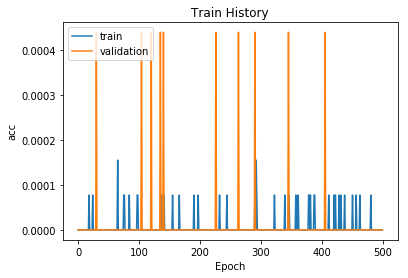

In [21]:
show_train_history(train_history,'acc','val_acc')

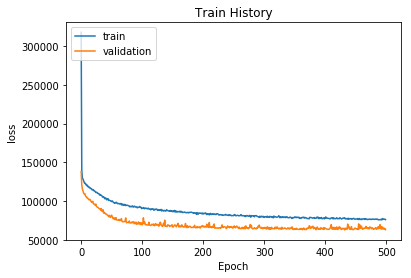

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
val_out =  model.predict(validation_data_scaledFeatures)

In [24]:
val_out[:18]

array([[ 776351.94],
       [1719813.6 ],
       [ 689158.06],
       [ 534482.1 ],
       [ 922716.56],
       [ 279081.28],
       [ 274653.28],
       [ 689482.7 ],
       [1229808.9 ],
       [2232709.  ],
       [ 431409.7 ],
       [ 578399.4 ],
       [ 370058.06],
       [ 553631.3 ],
       [ 243312.44],
       [1494811.1 ],
       [ 548109.6 ],
       [ 259871.53]], dtype=float32)

In [25]:
from sklearn import metrics

In [26]:
metrics.mean_absolute_error(val_out,validation_data_Label)

62249.60227469922

In [27]:
test_out =  model.predict(test_scaledFeatures)

In [28]:
the_test_output = pd.DataFrame(test_out,columns=['price'])

In [29]:
the_test_output[:10]

,price
0,631331.12500
1,685252.25000
2,467527.03125
3,393872.43750
4,856123.81250
5,415140.40625
6,192467.15625
7,322282.34375
8,344462.25000
9,506682.96875


In [30]:
pd=test_data
pd.insert(len(test_data.columns),'price',the_test_output)

In [31]:
output_cols = ["id","price"]
pd= pd[output_cols]

In [32]:
pd.to_csv('house_data/107368020_house_final2.csv',index=False,header=True)